## Fetching historic futures data with the OpenBB Platform

In [13]:
import pandas as pd
from IPython.display import display
from openbb import obb

In [14]:
print(obb)

OpenBB Platform v4.4.0

Utilities:
    /account
    /user
    /system
    /coverage

Routers:
    /commodity
    /crypto
    /currency
    /derivatives
    /econometrics
    /economy
    /equity
    /etf
    /fixedincome
    /index
    /news
    /quantitative
    /regulators
    /technical

Extensions:
    - commodity@1.3.0
    - crypto@1.4.0
    - currency@1.4.0
    - derivatives@1.4.0
    - econometrics@1.5.1
    - economy@1.4.0
    - equity@1.4.0
    - etf@1.4.0
    - fixedincome@1.4.1
    - index@1.4.0
    - news@1.4.0
    - quantitative@1.4.1
    - regulators@1.4.0
    - technical@1.4.1

    - alpha_vantage@1.4.0
    - benzinga@1.4.0
    - biztoc@1.4.0
    - bls@1.1.0
    - cboe@1.4.0
    - cftc@1.1.0
    - deribit@1.0.0
    - ecb@1.4.0
    - econdb@1.3.0
    - federal_reserve@1.4.0
    - finra@1.4.0
    - finviz@1.3.0
    - fmp@1.4.0
    - fred@1.4.0
    - government_us@1.4.0
    - imf@1.1.0
    - intrinio@1.4.0
    - multpl@1.1.0
    - nasdaq@1.4.0
    - oecd@1.4.0
    - polygon

In [15]:
obb.user.preferences.output_type = "dataframe"

Fetches the futures curve data for the symbol "VX" and stores it in 'data'

In [16]:
data = obb.derivatives.futures.curve(symbol="VX")

In [17]:
display(data)

,expiration,price
0,2025-03,16.95
1,2025-04,17.85
2,2025-05,18.35
3,2025-06,18.65
4,2025-07,19.05
5,2025-08,19.20
6,2025-09,19.45
7,2025-10,19.65
8,2025-11,16.45


Converts the 'expiration' column to datetime format and sets it as the index of 'data'

In [18]:
data.index = pd.to_datetime(data.expiration)

Plots the data with the new datetime index

<Axes: xlabel='expiration'>

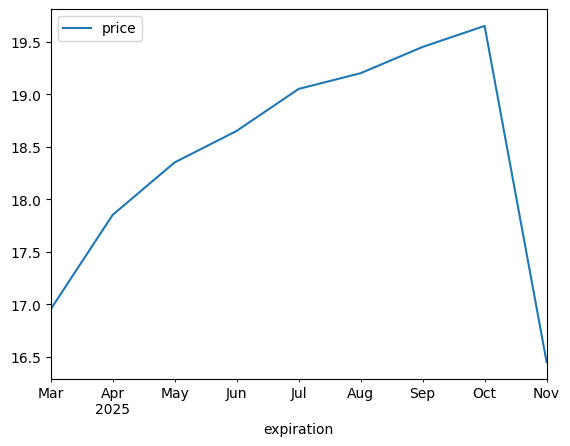

In [19]:
data.plot()

Fetches historical futures data for the symbol "CL" within the specified date range and stores it in 'data'

In [42]:
data = obb.derivatives.futures.historical(
    symbol="CL", start_date="2020-01-01", end_date="2022-12-31", provider="yfinance"
)

In [43]:
display(data)

,open,high,low,close,volume
date,,,,,
2020-01-02,61.599998,61.599998,60.639999,61.180000,486873.0
2020-01-03,61.180000,64.089996,61.130001,63.049999,885861.0
2020-01-06,63.709999,64.720001,62.639999,63.270000,724236.0
2020-01-07,62.910000,63.150002,62.110001,62.700001,582649.0
2020-01-08,62.840000,65.650002,59.150002,59.610001,1205710.0
...,...,...,...,...,...
2022-12-23,78.180000,80.330002,77.980003,79.559998,237711.0
2022-12-27,79.900002,81.180000,79.160004,79.529999,199601.0
2022-12-28,79.889999,79.919998,77.300003,78.959999,207717.0


Defines a list of expiration dates for future contracts

In [49]:
expirations = [
    "2025-12",
    "2026-12",
    "2027-12",
    "2028-12",
    "2029-12",
    "2030-12",
]

Initializes an empty list to store individual contract data

In [50]:
contracts = []

Iterates over each expiration date, fetching and renaming historical futures data for "CL", and appends it to 'contracts'

In [51]:
for expiration in expirations:
    df = (
        obb.derivatives.futures.historical(
            symbol="CL",
            expiration=expiration,
            start_date="2022-01-01",
            end_date="2024-12-31",
            provider="yfinance",
        )
    ).rename(columns={"close": expiration})
    contracts.append(df[expiration])

Combines the individual contract data into a single DataFrame, transposes it, and drops any rows with missing values

In [52]:
historical = pd.DataFrame(contracts).transpose().dropna()

In [53]:
display(historical)

,2025-12,2026-12,2027-12,2028-12,2029-12,2030-12
date,,,,,,
2022-01-03,60.529999,59.070000,58.310001,58.060001,57.910000,58.160000
2022-01-04,61.220001,59.709999,58.939999,58.639999,58.540001,58.790001
2022-01-05,60.869999,59.360001,58.590000,58.340000,58.189999,58.439999
2022-01-06,61.169998,59.599998,58.830002,58.580002,58.430000,58.680000
2022-01-07,60.980000,59.410000,58.639999,58.389999,58.240002,58.490002
...,...,...,...,...,...,...
2024-12-24,67.019997,65.029999,63.860001,63.110001,62.599998,62.110001
2024-12-26,66.709999,64.739998,63.570000,62.849998,62.360001,61.869999
2024-12-27,67.279999,65.010002,63.700001,62.919998,62.410000,61.919998


Plots the data for the most recent historical contract

<Axes: >

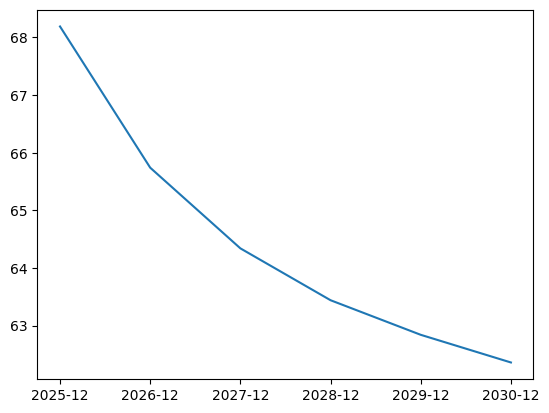

In [54]:
historical.iloc[-1].plot()

**Jason Strimpel** is the founder of <a href='https://pyquantnews.com/'>PyQuant News</a> and co-founder of <a href='https://www.tradeblotter.io/'>Trade Blotter</a>. His career in algorithmic trading spans 20+ years. He previously traded for a Chicago-based hedge fund, was a risk manager at JPMorgan, and managed production risk technology for an energy derivatives trading firm in London. In Singapore, he served as APAC CIO for an agricultural trading firm and built the data science team for a global metals trading firm. Jason holds degrees in Finance and Economics and a Master's in Quantitative Finance from the Illinois Institute of Technology. His career spans America, Europe, and Asia. He shares his expertise through the <a href='https://pyquantnews.com/subscribe-to-the-pyquant-newsletter/'>PyQuant Newsletter</a>, social media, and has taught over 1,000+ algorithmic trading with Python in his popular course **<a href='https://gettingstartedwithpythonforquantfinance.com/'>Getting Started With Python for Quant Finance</a>**. All code is for educational purposes only. Nothing provided here is financial advise. Use at your own risk.